# 📚 4. Подготовка данных к обучению

## 🎯 Цели этапа
1. Разделение данных на признаки и целевую переменную
2. Стратифицированное разделение на train/test выборки
3. Масштабирование числовых признаков
4. Балансировка классов для борьбы с дисбалансом
5. Сохранение подготовленных данных

## 📊 Исходные данные
- Обработанный датасет: 23 признака, 10,002 наблюдений
- Дисбаланс классов: 79.6%/20.4% (Exited: 0/1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

os.chdir('..')

sys.path.insert(0, 'src')

from data_preparation import PrepareData

os.chdir('notebooks')

df_preprocessed = pd.read_csv('../data/bank_churn_preprocessing.csv')
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CreditScore                    10002 non-null  int64  
 1   Gender                         10002 non-null  int64  
 2   Age                            10002 non-null  float64
 3   Tenure                         10002 non-null  int64  
 4   Balance                        10002 non-null  float64
 5   NumOfProducts                  10002 non-null  int64  
 6   HasCrCard                      10002 non-null  float64
 7   IsActiveMember                 10002 non-null  float64
 8   EstimatedSalary                10002 non-null  float64
 9   Exited                         10002 non-null  int64  
 10  Is_Senior_Active               10002 non-null  int64  
 11  Active_With_Multiple_Products  10002 non-null  int64  
 12  Value_Client                   10002 non-null 

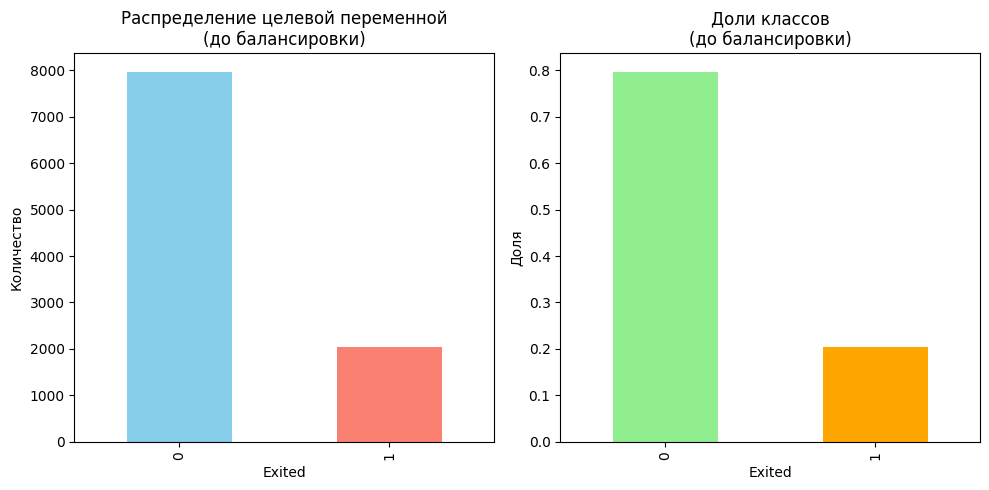

📈 Статистика по целевой переменной:
Класс 0 (лояльные): 7964 (79.6%)
Класс 1 (ушедшие): 2038 (20.4%)


In [ ]:
def display_disbalance(column):
    """
    Отображение дисбаланса целевого признака.

    # Argument:
        **column**: признак, который хотим отобразить
    """
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    column.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Распределение целевой переменной\n(до балансировки)')
    plt.xlabel('Exited')
    plt.ylabel('Количество')

    plt.subplot(1, 2, 2)
    column.value_counts(normalize=True).plot(kind='bar', color=['lightgreen', 'orange'])
    plt.title('Доли классов\n(до балансировки)')
    plt.xlabel('Exited')
    plt.ylabel('Доля')

    plt.tight_layout()
    plt.show()

    class_distribution = column.value_counts()
    print("📈 Статистика по целевой переменной:")
    print(f"Класс 0 (лояльные): {class_distribution[0]} ({class_distribution[0]/len(column)*100:.1f}%)")
    print(f"Класс 1 (ушедшие): {class_distribution[1]} ({class_distribution[1]/len(column)*100:.1f}%)")

display_disbalance(df_preprocessed['Exited'])

In [3]:
preparing = PrepareData(df_preprocessed)

X_train, X_test, y_train, y_test = preparing.preparing()
X_train

✅ Данные и объекты сохранены в ../data/processed


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Is_Senior_Active,...,New_HighRisk,German_Female_Risk,Geo_France,Geo_Germany,Geo_Spain,AgeGroup_18-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_60+
9820,-0.030075,0,0.666667,0.0,0.170941,0.0,0.0,0.0,-0.491169,0,...,0,1,0,1,0,0,0,1,0,0
4670,-0.112782,1,0.333333,-0.6,0.320628,1.0,1.0,0.0,0.415080,0,...,0,0,0,1,0,0,0,1,0,0
8738,-0.187970,1,0.500000,0.6,-0.201918,0.0,0.0,1.0,0.286657,1,...,0,0,1,0,0,0,0,1,0,0
8879,1.180451,1,0.500000,-0.6,-0.759413,1.0,1.0,1.0,0.339542,1,...,0,0,1,0,0,0,0,1,0,0
8860,1.172932,1,-1.083333,-0.2,0.196626,0.0,1.0,0.0,0.760655,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,0.624060,0,0.500000,0.8,0.013811,0.0,0.0,0.0,0.867601,0,...,0,1,0,1,0,0,0,1,0,0
3440,0.526316,0,0.833333,-0.6,-0.070674,0.0,1.0,1.0,-0.092336,1,...,0,0,1,0,0,0,0,1,0,0
9356,-2.097744,1,0.416667,0.4,-0.759413,0.0,1.0,0.0,-0.223881,0,...,0,0,1,0,0,0,0,1,0,0
8453,-0.639098,0,0.333333,0.8,0.319665,0.0,1.0,0.0,0.432571,0,...,0,0,1,0,0,0,0,1,0,0


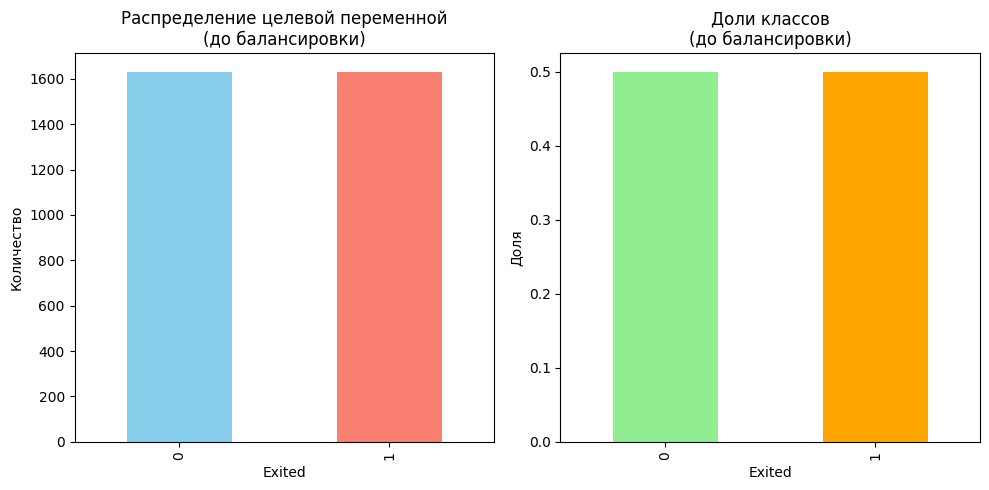

📈 Статистика по целевой переменной:
Класс 0 (лояльные): 1630 (50.0%)
Класс 1 (ушедшие): 1630 (50.0%)


In [4]:
display_disbalance(y_train)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3260, 22), (2001, 22), (3260,), (2001,))

## 🔧 Реализованные методы подготовки

### **1. Стратифицированное разделение на train/test**

```python
- test_size: 0.2 (20% данных в тестовую выборку)
- random_state: 42 (воспроизводимость результатов)
- stratify: y (сохранение распределения классов)
```

Для того, чтобы наша модель смогла понять устройство наших данных, мы должны разделить наш датасет на обучающую и тестовую выборки. На тренировочкой выборке модель "обучается", ищет закономерности и зависимости в данных, а на тестовой выборке модель по полученным данным строит предсказания, исходя из знаний, которые она получила в ходе обучения. Размер тренировочной выборки - 80%, а тестовой - 20% от общего количества записей датасета. Данное разделение является наиболее распространенным правилом, которое хорошо проверено уже на многих примерах. 80% train-выборки (3260 примеров) достаточно для того, чтобы модель эффективно обучилась, выявила закономерности и показала хороший результат на метриках. 20% (2001) test-выборки достаточно для объективной оценки качества модели.

Для того, чтобы каждый раз модель не обучалась на новых данных, мы задаем параметр random_state, с помощью которого мы будем иметь дело с одними и теми же данными.

Также, для того, чтобы в обучающую выборку попало ровное количество записей как ушедших, так и лояльных клиентов (`Exited=1` и `Exited=0`), мы задаем параметр stratify=y, где y - наш таргет (`Exited`)

**Результат:**
- Train set: 3,260 наблюдений (80%)
- Test set: 2,001 наблюдение (20%)
- Сохранено оригинальное распределение классов в обеих выборках

### **2. Масштабирование числовых признаков**
```python
# Использован RobustScaler:
- Устойчив к выбросам (использует медиану и IQR)
- Не требует нормального распределения данных
- Масштабируемые признаки: 'CreditScore', 'Age', 'Balance', 'EstimatedSalary'
```

По полученным на этапе EDA результатам мы масштабировали данные с помощью RobustScaler. Использовали этот метод масштабирования, посклольку наши данные распределены не нормально, данный метод устойчив к выбросам.

**Преимущество:** Сохранение структуры данных при наличии выбросов.

### **3. Балансировка классов методом RandomUnderSampler**
```python
# RandomUnderSampler
- Уменьшает majority класс до размера minority класса
- Сохраняет только реальные данные (без синтетических примеров)
- Уменьшает риск переобучения по сравнению с oversampling методами
- Сохраняет распределение исходных данных
```

В ходе анализа распределения целевого признака (`Exited`), мы выяснили, что количество ушедших клиентов меньше, чем количество лояльных, поэтому было принятно решение использование алгоритм `RandomUnderSampler`, c целью сохранения данных реальными (а не синтетическими), а также более стабильного качества при оценке меделей. Стоит отметить, что алгоритм балансировки классов применялся ТОЛЬКО к тренировочной выборке, поскольку нам важно, чтобы данные, которые поступали в качестве тестовых были различными: в них может присутствовать дисбаланс классов (в реальной жизни люяльных клиентов обычно больше), а может и получиться равное распределение.

**Результат балансировки:**
- До: {0: 7964, 1: 2038} (80%/20%)
- После: {0: 1630, 1: 1630} (50%/50%)

### **4. Сохранение подготовленных данных**
```python
# Данные сохранены в формате Pickle:
- X_train.pkl, X_test.pkl - матрицы признаков
- y_train.pkl, y_test.pkl - целевые переменные  
- scaler.pkl - обученный scaler для новых данных
- feature_names.pkl - названия признаков
```

**Преимущества Pickle:**
- Сохранение типов данных и структур
- Быстрая загрузка/сохранение
- Компактный размер файлов

Тренировочные и тестовые выборки мы сохранили в формате pickle, поскольку это ускоряет загрузку и сохранение выборок, а также позволяет хранить файлы в компактном размере. Также были сохранен метод масштабирования и название наших признаков, в случае если нам понадобиться дообучать модели ML

---

## 📈 Визуализация результатов

### **Распределение классов до балансировки:**
```
Класс 0 (лояльные): 7964 (79.6%)
Класс 1 (ушедшие): 2038 (20.4%)
```

### **Распределение классов после балансировки:**
```
Класс 0 (лояльные): 1630 (50.0%)
Класс 1 (ушедшие): 1630 (50.0%)
```

---

## 🎯 Ключевые особенности реализации

### **Архитектура класса `PrepareData`:**
- Инкапсуляция всей логики подготовки данных
- Состояние объекта сохраняет все промежуточные результаты
- Возможность переиспользования на новых данных

### **Обработка дисбаланса:**
- Тестовые данные НЕ балансируются (реалистичная оценка)
- Тренировочные данные балансируются для улучшения обучения моделей
- SMOTE обеспечивает разнообразие синтетических примеров

### **Воспроизводимость:**
- Фиксированный random_state (42)
- Сохранение preprocessing объектов (scaler)
- Возможность загрузки готовых данных для следующих этапов

---

## ✅ Готовность к моделированию

Данные полностью подготовлены для построения ML-моделей:
- ✅ Признаки масштабированы и нормализованы
- ✅ Дисбаланс классов устранен в тренировочных данных
- ✅ Тестовые данные сохраняют реальное распределение
- ✅ Все объекты preprocessing сохранены для дальнейшего использования
- ✅ Гарантирована воспроизводимость результатов


## 🔗 Сохраненные файлы
- `X_train.pkl`, `X_test.pkl` - матрицы признаков
- `y_train.pkl`, `y_test.pkl` - целевые переменные
- `scaler.pkl` - обученный RobustScaler
- `feature_names.pkl` - список названий признаков

---

**Следующий этап:** Построение и сравнение machine learning моделей для прогнозирования оттока клиентов.